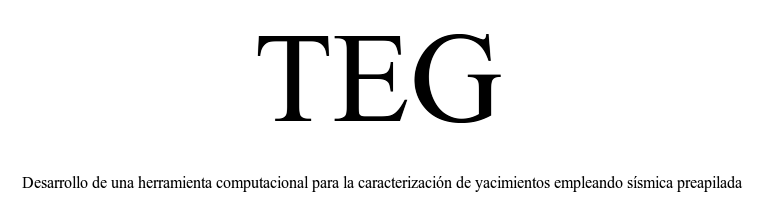


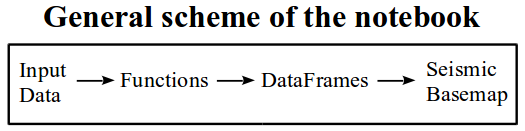   

This Jupyter-Notebook contains a collection of functions to organize Seismic and Wells data for the further plot of a Seismic Basemap. To build the final output, two type files are required: A text file and a SEG-Y file. The given information will be organized in an arrangement of columns and rows usually known as DataFrames, tabular array or just tabular data an then plotted. The Libraries and modules used to achieve the presented scheme are explained later on this notebook.

## Modules and libraries to import

In [1]:
import segyio
import numpy as np
import pandas as pd
np.set_printoptions(threshold=np.inf)
import holoviews as hv
from holoviews import opts, dim
from bokeh.models import HoverTool
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Modules and libraries explanation

### Segyio: 
Is a small LGPL licensed C library for easy interaction with SEG-Y and Seismic Unix formatted seismic data, with language bindings for Python and Matlab. Segyio is an attempt to create an easy-to-use, embeddable, community-oriented library for seismic applications.
#### Developed by Jørgen Kvalsvik (Equinor): https://github.com/equinor/segyio


### Numpy:
NumPy is the fundamental package for scientific computing with Python. Among these, linear algebra utilities besides Fourier transform and N-dimensional array object functions can be found.
#### Developed by Scipy: https://www.numpy.org/

### Pandas:
Pandas is a library written as an extension of Numpy to analyze data. DataFrames are the most used structures offered by Pandas where the data is organized by columns and rows, setting commonly known as tabular data.
#### Developed by Wes McKinney: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

### Holoviews:
HoloViews is an open-source Python library designed to make data analysis and visualization seamless and simple while providing a platform that works with three different visualization tools as a backend: Bokeh, Matplotlib and Potly.
#### Developed by PyViz: http://holoviews.org/user_guide/index.html


useful python slicing tips https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/





# ============================================================

## Input files
The _data_ folder inside the main proyect has been settled as the default path for the data to read. For any file located outside this folder, the path of the variables located in the cell bellow have to be changed at convenience. 

We have provided enough data to test this notebook inside the _data_ folder. There can found the partial angle stacks of the __POSEIDON 3D SURVEY__ (set as the default survey) besides partial angle stacks and prestack data of the __STRATTON 3D SURVEY__ plus the well's information of each. Both proyects are available in the _SEG's wiki Open Data_ section: https://wiki.seg.org/wiki/Open_data

Although a survey can have many angle gathers, all of them have the same geometry, therefore only one them is needed to plot a basemap.



In [2]:
# Name of the Seismic Survey
seismic_survey = 'POSEIDON 3D' # this variable will be used to write the tittle of the figures in this notebook 

# Path of the Seismic file
seismic_path = '../data/NS2900-2200_3000-2300.sgy' # Choose on of the gathers

# Path of the well's file
wells_path = '../data/Pozos_Info.txt'

# ============================================================

## Organizing the data in (Pandas)DataFrames

### F.1) wells_data_organization (wells_path)
A function tthat builds a DataFrame using the well's information within the text file that by default is Pozos_Info.txt located in the _data_ folder. The parameters needed for the functions to work well must be structured in one line per well using a single blank space as their separator. The following picture ilustrates the parameters and the proper way to structure them:   
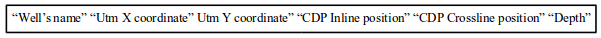




In [3]:
def wells_data_organization(wells_path = wells_path):
    
    """
    
    A function to build a DataFrame using the well's information within the Seismic Survey. 
    
    Argument:
    The argument of the function is the path where the text file is located. By default, the function will
    organize the information inside Pozos_info.txt file located in the data folder.
    
    Return:
    A (Pandas)DataFrame with the following columns: ['name','utmx','utmy','cdp_iline','cdp_xline','depth']
    
    """   
    
    well_dataframe = pd.read_csv(wells_path,
                        sep=' ',
                        header = None, 
                        names= ['name','utmx','utmy','cdp_iline','cdp_xline','depth'])
    
    return(well_dataframe)

### Initializing a key to generalize the argument of the subsequent functions
wells_dataframe = wells_data_organization(wells_path)

### F.2) cube_data_organization(list_of_paths)
A function that builds a DataFrame using the information of the trace headers within the Seismic file of choice. The _data_ folder contains two different surveys to test this notebook: the __POSEIDON 3D SURVEY__ and the __STRATON FIELD SURVEY__. The format of the seismic data used in this notobook is the standard SEG-Y (.sgy extension) that follows the byte distribution that's shown here:   __https://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev2_0-mar2017.pdf__

In [4]:
def cube_data_organization(seismic_path = seismic_path, step = 1):
    
    """
    
    A function to build a DataFrame using the information of the trace headers of a standard SEG-Y file. 
    
    Argument:
    The argument of the function is the path where the standard SEG-Y is located and the step used to read the
    Seismic file.By default, the data of the POSEIDON 3D SURVEY and the STRATON FIELD SURVEY are located inside 
    the data folder.
    
    Return:
    A (Pandas)DataFrame with the following trace header information: 
    ['tracf','(CDP)utmx','(CDP)utmy','(CDP)iline','(CDP)xline']
    
    """
    
    # Initializing the DataFrame
    trace_coordinates = pd.DataFrame() 
    
    # Opening the seismic file
    with segyio.open(seismic_path,'r') as segy: 
        
        # Declaring variables to slice the array given by segyio
        fta = 0 # fti stands for: First Trace of the Array
        lta = segy.tracecount # lti stands for: Last Trace of the Array     
        
        # # Adding the columns to the DataFrame for each header of interest 
        trace_coordinates['tracf'] = segy.attributes(segyio.TraceField.TRACE_SEQUENCE_FILE)[fta:lta:step] #b(5-8)
        trace_coordinates['utmx'] = segy.attributes(segyio.TraceField.CDP_X)[fta:lta:step] #b(181-184)
        trace_coordinates['utmy'] = segy.attributes(segyio.TraceField.CDP_Y)[fta:lta:step] #b(185-188)
        trace_coordinates['cdp_iline'] = segy.attributes(segyio.TraceField.INLINE_3D)[fta:lta:step] #b(189-192)
        trace_coordinates['cdp_xline'] = segy.attributes(segyio.TraceField.CROSSLINE_3D)[fta:lta:step] #b(193-196)
        
    # A scalar (bytes 71-72) are usually aplied to the cdp coordinates in the trace headers:
        scalar = segy.attributes(segyio.TraceField.SourceGroupScalar)[fta:lta:step] # b (71-72)
        trace_coordinates['utmx'] = np.where(scalar == 0, trace_coordinates['utmx'],
                                        np.where(scalar > 0, trace_coordinates['utmx'] * scalar, 
                                                                 trace_coordinates['utmx'] / abs(scalar)))
        trace_coordinates['utmy'] = np.where(scalar == 0, trace_coordinates['utmy'],
                                        np.where(scalar > 0, trace_coordinates['utmy'] * scalar, 
                                                                trace_coordinates['utmy'] / abs(scalar)))

    return (trace_coordinates)

### Initializing a key to generalize the argument of the subsequent functions
trace_dataframe = cube_data_organization(seismic_path)

# ============================================================

# Basemap functions

## F.1) Step_selection()
A function that allows the user to select the step to plot the data (basemap) through an input method.

In [5]:
def step_compute():
    
    """
    
    A function to compute the step to use in the basemap function.
    
    Argument:
    This function has no argument instead it allows the user to choose it through an input method.
    
    Return:
    A list with integers that represents the step to be used either by the of traces or lines in the 
    basemap function. 

    """
    
# Infinity loop to shield the first input method
    while True:
        val = input('Introduce the percentage of the traces to shown in the Basemap = ')
        print(' ')

        # First shield for the initial input method: Percentage
        try:
            step = (int(val) / 100) ** (-1) # Step computation
            print('The input percentage corresponds to a step of ' + str(step))
            print(' ')
            ans = input('Are you agree with the computed step? (yes/no): ')
            print(' ')

            # Conditionals to make the user choose between the first method and the second one: by hand.
            if ans == 'yes':
                break
            if ans == 'no':

                # Infinity loop to shield the second input method
                while True:
                    val = input('Introduce a new step to use = ') # Step setting (by hand)
                    print(' ')

                    # Second shield for the last input method: by hand
                    try:
                        step = int(val) 
                        break

        # First exception: the second method
                    except ValueError:
                        print('Introduce a valid input')
                        print(' ')
            
            # Last conditional of the second method
            else:
                print('Introduce a valid input')
                print(' ')
            
            # The breaker of the first loop in case the 'no' option is used.
            break
                
        except ValueError:
            print('Introduce a valid input')
            print(' ')
            
# Step for inlines and crosslines

    
    while True:
        val2 = input('Do you wish to use the previous step for inline and crossline plot? (yes/no): ')
        print(' ')
        if val2 == 'yes':
            ix_step = step
            break

        if val2 == 'no':
            val3 = input('Introduce a new step = ')
            try:
                ix_step = int(val3) # Step computation
                print(' ')
                break
            
            except ValueError:
                print('Introduce a valid input')
                print(' ')

        else:
            print('Introduce a valid option')
            print(' ')
    
    return ([int(step),int(ix_step)])





### F.2) Polygon_building (dataframe)
A function that computes the coordinates of a polygon that represents the limits of the Seismic Survey.

In [6]:
def polygon_building(cube_dataframe):
    
    """
    
    A function that computes the limit of the Seismic Survey given a DataFrame.
    
    Argument:
    The argument of the function is the DataFrame from where the coordinates of the Seismic Survey boundaries 
    will be extracted. 
    
    Return:
    A DataFrame with the coordinates of the polygon edges.
    
    """  
    
    # Survey's bounds plotting
    ## Taking the index of the min/max coordinates
    utmx_min_ind = cube_dataframe['utmx'].idxmin()
    utmx_max_ind = cube_dataframe['utmx'].idxmax()
    utmy_min_ind = cube_dataframe['utmy'].idxmin()
    utmy_max_ind = cube_dataframe['utmy'].idxmax()
    
    ## Extracting the min/max data from dataframe
    utmx_min = cube_dataframe.iloc[utmx_min_ind]
    utmx_max = cube_dataframe.iloc[utmx_max_ind]
    utmy_min = cube_dataframe.iloc[utmy_min_ind]
    utmy_max = cube_dataframe.iloc[utmy_max_ind]
    
    ## Building a new DataFrame for further plot
    polygon = pd.concat([utmx_min,utmy_min,utmx_max,utmy_max,utmx_min],
                         ignore_index=True, axis='columns').transpose()
    
    return (polygon)

### F.3) basemap(cube_dataframe, wells_dataframe, seismic_path)
A function to plot a Seismic Basemap compounded by the wells, traces, inline and crossline information for a given data. The function allows the user to select the step that will be used to either slice the given dataframe or to plot the lines within it. 
#### Note:
The Holoviews Scatter element does not allow to use loops to plot the data according to a step like the Curve element, therefore in order to apply a step to plot the traces, a new DataFrame is builded according the parameter mentioned before.

         
# WARNING                  
Once the output is plotted, beware of the hover information: the dots are very small so the tool will display all the overlaying hovers related to the zone that the mouse covers. The bigger the data and the zoom the function loads, the quantity of overlying hovers will pop out. This amount of data can freeze a computer, therefore we recomend to use a proper step for traces (percentage of the data shown) or to deactivate the hovertool for the _tracf_ item, located at the top of the hover icons.


In [13]:
from holoviews import dim, opts
def basemap(cube_dataframe = trace_dataframe, wells_dataframe = wells_dataframe, seismic_path = seismic_path):
    
    """
    
    A function to plot the basic information of a Seismic Survey. 
    
    Argument:
    The function uses three arguments: the trace DataFrame where the information of inline and crossline
    coordinates will be extracted, the wells dataframe wich contains the basic information of the wells inside the
    survey and finally the path of the Seismic Survey that's going to be used along the step (introduced by the
    user) to make a new DataFrame to plot the traces.
    
    Note:
    A new DataFrame is made in order to solve the issue related to the inability of the Holoviews Scatter element
    to use loops for a step implementation.
    
    Return:
    An Overlay holoviews element that is compounded by the boundary polygon, the seismic traces with a step,
    the inline/crosslines along the survey and finally the Wells. A tool to show the the coordinates and the 
    identification of each element have been designed (Hover Tool)
    
    """
    
    #Hover tool designation
    hover_t= HoverTool(tooltips=[('Tracf', '@tracf'),
                                 ('Inline', '@cdp_iline{int}'),
                                 ('Crossline', '@cdp_xline{int}')])
    
    hover_i = HoverTool(tooltips=[('Inline', '@cdp_iline'),
                                  ('CDP','@cdp_xline'),
                                  ('Tracf', '@tracf')])
    
    hover_x = HoverTool(tooltips=[('Crossline', '@cdp_xline'),
                                  ('CDP','@cdp_iline'),
                                  ('Tracf', '@tracf')])
    
    hover_w = HoverTool(tooltips=[('Pozo', '@name'),
                                  ('Utmx', '@utmx{int}'),
                                  ('Utmy', '@utmy{int}'),
                                  ('Inline', '@cdp_iline'),
                                  ('Xnline','@cdp_xline')])
      
    # Making the cube argument less stressful to read
    df = cube_dataframe
    
    # Computing the step list to extract the step for traces and lines
    step = step_compute()
    t_step, ix_step = step[0], step[1]
    
    # Loading the polygon dataframe + Plotting the boundaries of the data. Holoviews curve element
    polygon = polygon_building(df)
    pol = hv.Curve(polygon,'utmx','utmy', label = 'Polygon')
    pol.opts(linewidth=0.5, color='black')
     
    # Plotting traces inside the cube according to it's utm coordinates. Holoviews scatter element
    traces = hv.Scatter(df[0:len(df)+t_step:t_step],['utmx', 'utmy'],['tracf','cdp_xline','cdp_iline'], 
                        label='Trace (Tracf)')
    traces.opts(linewidth=1, color='black',s = 2, tools=[hover_t])
        
    ## Adding traces to the final output through loop   
    basemap = pol * traces
       
    # Plotting inlines. Holoviews curve element
    ## Computing the min and max cdp in inline  direction
    inline_max = df['cdp_iline'].unique().max()
    inline_min = df['cdp_iline'].unique().min()
 
    for i in range(inline_min, inline_max + ix_step, ix_step):   
        inline = hv.Curve(df[df['cdp_iline']==i], ['utmx', 'utmy'],['cdp_iline','cdp_xline','tracf'])
        inline.opts(linewidth=1, color='red', tools=[hover_i])
        
    ## Adding traces to the final output through loop   
        basemap = basemap * inline        
    
    # Plotting Xlines. Holoviews curve element
    ## Computing the min and max cdp in crossline direction
    xline_max = df['cdp_xline'].unique().max()
    xline_min = df['cdp_xline'].unique().min()

    for x in range(xline_min, xline_max + ix_step, ix_step):   
        xnline = hv.Curve(df[df['cdp_xline']==x], ['utmx', 'utmy'],['cdp_xline','cdp_iline','tracf'])
        xnline.opts(linewidth=1, color='blue', tools=[hover_x])
        
    ## Adding traces to the final output through loop
        basemap = basemap * xnline
    
    # Plotting Wells. Holoviews scatter element
    wells = hv.Scatter(wells_dataframe,['utmx','utmy'],['name','depth','cdp_iline', 'cdp_xline'], label = 'Wells')
    wells.opts(line_width=1,
           color='green',s = 7 ,marker = 'triangle',
           padding=0.1, show_grid=True, tools=[hover_w])
        
    
    # Overlaying boundaries, traces, inlines, xlines and wells plots
    basemap = basemap * wells
    
    # Setting options and formats to the final plot
        
    basemap.opts(padding = 0.1,
                 title = 'Seismic Survey: '+ seismic_survey,
                 fontsize={'title': 16, 'labels': 14, 'xticks': 8, 'yticks': 8},
                 xlabel = 'Coordenadas UTM X (m)', ylabel = 'Coordenadas UTM Y (m)', 
                 legend_position='top_left',
                 xformatter='%f', yformatter='%f')
    
    return (basemap)


basemap(trace_dataframe, wells_dataframe)

Introduce the percentage of the traces to shown in the Basemap = 10
 
The input percentage corresponds to a step of 10.0
 
Are you agree with the computed step? (yes/no): yes
 
Do you wish to use the previous step for inline and crossline plot? (yes/no): yes
 


ValueError: Unexpected option 'tools' for Scatter type across all extensions. Similar options for current extension ('matplotlib') are: ['hooks'].

### F.4) Number_of_lines_for_window()
A function that allows the user to select through an input method, the amount of lines to be taken in consideration to reduce the original DataFrame into a window of interest.

In [22]:
def number_of_lines_for_window():
    
    """
    
    A function that allows the user to select a dimension to build a window from a DataFrame. It's part of the
    arguments of the window_selection_dataframe function.
    
    Arguments:
    This function has no argument instead it allows the user to choose it through an input method.
     
    Return:
    An integer that represent the amount of lines to be taken in consideration by the window_selection_dataframe
    function.
       
    """
    while True:
        val1 = input('Introduce the amonunt of lines to take around the trace computed from the given arguments: ')
        try:
            n_lines = int(val1)
            print(' ')
            print('The function will take ' + str(n_lines) + ' lines around the trace computed')
            print(' ')
            break 
            
        except ValueError:
            print('Introduce a valid input ')
            print(' ')

    return (n_lines)

### F.5) window_selection_dataframe(inline, crossline, dataframe, number_of_lines = 5)
A function to define a window (from the original dataframe) for further work. T

In [23]:
def window_selection_dataframe(inline, crossline, dataframe):
    
    """
    
    A function to build a window around the intersection of the given inline and crossline coordinates. The 
    amount of data selected depends on the number of lines (in both seismic directions) choosen through and input 
    method (Number_of_lines_for_window function)
    
    Argument:
    The function uses both seismic coordinates (inline and crosslines) to compute a trace to be used as a datum 
    and a DataFrame to take the lines around this one controled by the window_selection_dataframe output.
    
    Example:
    If the seismic cordinates are: (inline,crossline) = (2900,2200) and the "numbers_of_lines" is equal to 5, 
    then the function will extract from the dataframe the values related to the intersecion of the lines which is
    a trace. It will aso extract 5 lines around the trace: 5 lines up and down the trace selected for both 
    directions: inline and crossline.
    
    Return:
    A (Pandas)DataFrame compounded by the lines (inline and crosslies) around the intersection of the given 
    coordinates. It's dimension is equal to: 2 * selected dimension + 1 
    
    """
    
    # Setting the amount of lines to plot around the given trace
    number_of_lines = number_of_lines_for_window()
    
    # Defining the boundaries of the window
    iline_min = inline - number_of_lines
    iline_max = inline + number_of_lines
    xline_min = crossline - number_of_lines
    xline_max = crossline + number_of_lines
    
    # Solving boundarie's problems: this adds more lines either in inline or crossline directions according to
    # how many lines the previous formula exceeds. By default, the amount of lines plotted is 11 (I/X) > 5-1-5 <
    if iline_min < dataframe['cdp_iline'].min():
        iline_max = iline_max + abs(iline_min - dataframe['cdp_iline'].min())
        
    if iline_max > dataframe['cdp_iline'].max():
        iline_min = iline_min - abs(iline_max - dataframe['cdp_iline'].max())    
    
    if xline_min < dataframe['cdp_xline'].min():
        xline_max = xline_max + abs(xline_min - dataframe['cdp_xline'].min()) 
        
    if xline_max > dataframe['cdp_xline'].max():
        xline_min = xline_min - abs(xline_max - dataframe['cdp_xline'].max()) 
        
    # Selecting the data according to the boundaries
    cropped_dataframe = dataframe[(dataframe.cdp_iline >= iline_min) &
                                  (dataframe.cdp_iline <= iline_max) & 
                                  (dataframe.cdp_xline >= xline_min) &
                                  (dataframe.cdp_xline <= xline_max)]
    
    #Reset and delete the index of the dataframe
    cropped_dataframe = cropped_dataframe.reset_index().drop(columns='index')
    
    return (cropped_dataframe)
    

In [26]:
cropped_traces = window_selection_dataframe(2998, 2203, trace_dataframe)
cropped_wells = window_selection_dataframe(2998, 2203, wells_dataframe)

Introduce the amonunt of lines to take around the trace computed from the given arguments: 10
 
The function will take 10 lines around the trace computed
 
Introduce the amonunt of lines to take around the trace computed from the given arguments: 10
 
The function will take 10 lines around the trace computed
 


#### Plotting cropped dataframes

In [27]:
basemap(cropped_traces, cropped_wells)

Introduce the percentage of the traces to shown in the Basemap = 75
 
The input percentage corresponds to a step of 1.3333333333333333
 
Are you agree with the computed step? (yes/no): yes
 
Do you wish to use the previous step for inline and crossline plot? (yes/no): no
 
Introduce a new step = 2
 


:Overlay
   .Curve.Polygon                                          :Curve   [utmx]   (utmy)
   .Scatter.Trace_left_parenthesis_Tracf_right_parenthesis :Scatter   [utmx,utmy]   (tracf,cdp_xline,cdp_iline)
   .Curve.I                                                :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.II                                               :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.III                                              :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.IV                                               :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.V                                                :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.VI                                               :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.VII                                              :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.VIII                                             :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.IX                                               :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.X                                                :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.XI                                               :Curve   [utmx,utmy]   (cdp_iline,cdp_xline,tracf)
   .Curve.XII                                              :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XIII                                             :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XIV                                              :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XV                                               :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XVI                                              :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XVII                                             :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XVIII                                            :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XIX                                              :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XX                                               :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XXI                                              :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Curve.XXII                                             :Curve   [utmx,utmy]   (cdp_xline,cdp_iline,tracf)
   .Scatter.Wells                                          :Scatter   [utmx,utmy]   (name,depth,cdp_iline,cdp_xline)

# ============================================================

# END OF THE JNBK1_BASEMAP